In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [3]:
boston = datasets.load_boston()

In [6]:
# print(boston.DESCR)
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
x = boston.data[:, 5]
y = boston.target
print(x.shape)
print(y.shape)

(506,)
(506,)


In [3]:
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x -2.5) ** 2 -1

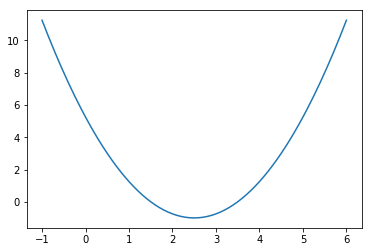

In [4]:
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
def dJ(theta):
    return 2* (theta -2.5)

In [6]:
def J(theta):
    return (theta -2.5)**2 -1

In [7]:
eta = 0.1
epsilon = 1e-4
theta = 0 
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient 
    if (abs(J(theta) - J(last_theta)) < epsilon):
        break
print(theta)
print(J(theta))

2.488194083792826
-0.9998606203425092


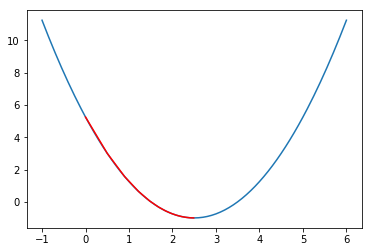

In [9]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient 
    theta_history.append(theta)
    if (abs(J(theta) - J(last_theta)) < epsilon):
        break
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r')

In [14]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x *3. +4. + np.random.normal(size=100)

X = x.reshape(-1, 1)

In [15]:
X.shape

(100, 1)

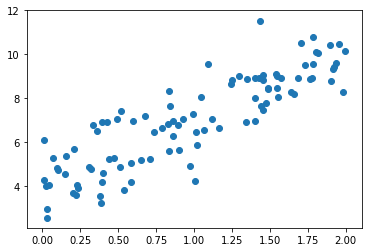

In [16]:
plt.scatter(x,y)
plt.show()

# 使用梯度下降法

In [17]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) -y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta)-y).dot(X_b[:,i])
    
    return res *2/len(X_b)

In [23]:
def gradient_descent(X_b, y, 
        initial_theta, eta, n_iters=1e3, epsilon=1e-7):
    
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient 

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [24]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)
print(theta)

[3.99481236 3.02953666]


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# standarScaler = StandardScaler()
# standarScaler.fit(X_train)

In [30]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size = n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0]+ np.random.normal(0., 10., size=m)


In [1]:
from playML.LinearRegression import LinearRegression

In [33]:
lin_reg = LinearRegression()
%time lin_reg.fit_normal(big_X, big_y)

CPU times: user 12.2 s, sys: 331 ms, total: 12.5 s
Wall time: 12.5 s


LinearRegression()

In [34]:
lin_reg2 = LinearRegression()
%time lin_reg2.fit_gd(big_X, big_y)


CPU times: user 3.97 s, sys: 7.24 ms, total: 3.98 s
Wall time: 3.98 s


LinearRegression()

In [37]:
from sklearn.linear_model import SGDRegressor

In [39]:
reg = SGDRegressor()
%time reg.fit(big_X, big_y)


CPU times: user 88.9 ms, sys: 0 ns, total: 88.9 ms
Wall time: 89.6 ms


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
np.random.seed(666)
X  = np.random.random(size=(1000, 10))
true_theta = np.arange(1,12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)
X.shape

(1000, 10)

In [41]:
y.shape

(1000,)

In [42]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [44]:
def J(theta, X_b, y):
    return  np.sum((y-X_b.dot(theta))**2) /len(X_b)

def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta)- y ) * 2. / len(y)

In [45]:
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        
        theta_2 = theta.copy()
        theta_2[i] -=epsilon
        res[i] = J(theta_1, X_b, y) -J(theta_2, X_b, y) / (2* epsilon)
        
    return res
        
        

In [46]:
def gradient_descent(dJ, X_b, y, 
        initial_theta, eta, n_iters=1e3, epsilon=1e-7):
    
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient 

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [52]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)

CPU times: user 60.4 ms, sys: 0 ns, total: 60.4 ms
Wall time: 62.4 ms


In [50]:
%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


CPU times: user 486 ms, sys: 0 ns, total: 486 ms
Wall time: 488 ms
